In [19]:
#librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from scipy.io.wavfile import read, write
from IPython.display import Audio
#some stylish
plt.style.use('seaborn')
%matplotlib inline

In [20]:
## Lectura de los audios .wav
Fs, data = read('mezcla_Tono_1.wav')
mezcla_tono_1 = data
Fs, data = read('mezcla_Tono_2.wav')
mezcla_tono_2 = data
Fs, data = read('mezcla_Tono_3.wav')
mezcla_tono_3 = data

# Mezclas

## Representación auditiva

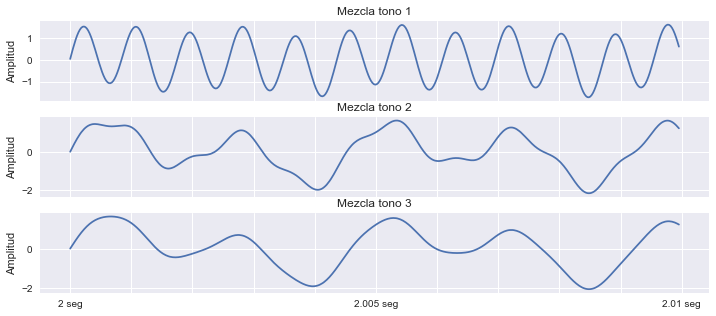

In [21]:
# Sampling Frequency is Fs: 44100
label_void = ['','','','','','','','','','','']
signals_mixes = np.c_[mezcla_tono_1, mezcla_tono_2,
                      mezcla_tono_3].astype(np.float) # señales fuentes
signals_mixes /= signals_mixes.std(axis=0) #datos estandarizados
segIni = 2
segFin = 2.01
label = ['{} seg'.format(segIni),'','','','','{} seg'.format((segIni+segFin)/2),'','','','','{} seg'.format(segFin)]
locs = np.linspace(0,((segFin - segIni)*44100),11)
inicio = int(Fs*segIni)
fin = int(Fs*segFin)
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12, 5))
ax1.plot(signals_mixes.T[0][inicio:fin])
plt.sca(ax1)
plt.title('Mezcla tono 1')
plt.ylabel('Amplitud')
plt.xticks(locs,label_void)
ax2.plot(signals_mixes.T[1][inicio:fin])
plt.sca(ax2)
plt.title('Mezcla tono 2')
plt.ylabel('Amplitud')
plt.xticks(locs,label_void)
ax3.plot(signals_mixes.T[2][inicio:fin])
plt.sca(ax3)
plt.title('Mezcla tono 3')
plt.ylabel('Amplitud')
plt.xticks(locs,label)
plt.show()

In [22]:
print('Mezcla tono 1')
Audio(mezcla_tono_1 , rate=Fs)

Mezcla tono 1


In [23]:
print('Mezcla tono 2')
Audio(mezcla_tono_2 , rate=Fs)

Mezcla tono 2


In [24]:
print('Mezcla tono 3')
Audio(mezcla_tono_3 , rate=Fs)

Mezcla tono 3


## Representación tabular

In [25]:
t = np.linspace(0,10,441000)
pd.DataFrame(np.array([t, signals_mixes.T[0],signals_mixes.T[1],signals_mixes.T[2]]).T, columns=['TIEMPO', 'VALOR MEZCLA 1', 'VALOR MEZCLA 2', 'VALOR MEZCLA 3']).set_index('TIEMPO')

VALOR MEZCLA 1  VALOR MEZCLA 2  VALOR MEZCLA 3
TIEMPO                                                   
0.000000         0.000000        0.000000        0.000000
0.000023         0.244709        0.145475        0.108672
0.000045         0.482652        0.290949        0.217344
0.000068         0.709318        0.430006        0.323978
0.000091         0.917941        0.566923        0.429254
...                   ...             ...             ...
9.999909        -0.917941       -0.566923       -0.429254
9.999932        -0.709318       -0.430006       -0.323978
9.999955        -0.482652       -0.290949       -0.217344
9.999977        -0.244709       -0.145475       -0.108672
10.000000        0.000000        0.000000        0.000000

[441000 rows x 3 columns]

In [26]:
signals_mixes.T[0]

array([ 0.        ,  0.24470912,  0.48265208, ..., -0.48265208,
       -0.24470912,  0.        ])

In [27]:
signals_mixes.T[1]

array([ 0.        ,  0.14547456,  0.29094913, ..., -0.29094913,
       -0.14547456,  0.        ])

In [28]:
signals_mixes.T[2]

array([ 0.        ,  0.10867191,  0.21734383, ..., -0.21734383,
       -0.10867191,  0.        ])